In [1]:
!pwd

/home/onwood/SBA_project_3D


In [2]:
import torch
import matplotlib.pylab as plt
import matplotlib.patches as patches
import numpy as np
from utils.mydataset import MyDataset

In [3]:
data_dir = 'dataset'
dataset = MyDataset(data_dir=data_dir)

In [4]:
len(dataset)

69624

In [5]:
dataset.action_dir_dic.keys()

dict_keys(['A073', 'A086', 'A046', 'A078', 'A066', 'A033', 'A024', 'A038', 'A025', 'A031', 'A084', 'A105', 'A072', 'A011', 'A047', 'A063', 'A094', 'A019', 'A071', 'A003', 'A041', 'A010', 'A067', 'A030', 'A032', 'A085', 'A044', 'A082', 'A064', 'A077', 'A036', 'A088', 'A020', 'A016', 'A062', 'A065', 'A017', 'A013', 'A029', 'A061', 'A021', 'A006', 'A034', 'A079', 'A068', 'A012', 'A028', 'A083', 'A091', 'A004', 'A090', 'A070', 'A074', 'A087', 'A043', 'A069', 'A014', 'A093', 'A015', 'A103', 'A075', 'A049', 'A081', 'A001', 'A005', 'A018', 'A042', 'A037', 'A045', 'A076', 'A089', 'A002', 'A092'])

In [6]:
dataset.all_data_dir_list[0], dataset.all_data_dir_list[90], dataset.all_data_dir_list[10201], dataset.all_data_dir_list[56704]

('dataset/a073_kp/S028C002P087R001A073_rgb_kp.json',
 'dataset/a073_kp/S030C002P075R001A073_rgb_kp.json',
 'dataset/a084_kp/S028C001P070R002A084_rgb_kp.json',
 'dataset/a103_kp/S018C002P008R001A103_rgb_kp.json')

In [7]:
data_item = dataset[10201]
data_item.keys()
# data_item['semi_positives_c0'][0].size()

dict_keys(['anchor_c0', 'anchor_aug_c0', 'semi_positives_c0', 'anchor_c1', 'anchor_aug_c1', 'semi_positives_c1', 'anchor_c2', 'anchor_aug_c2', 'semi_positives_c2', 'anchor_c3', 'anchor_aug_c3', 'semi_positives_c3', 'anchor_c4', 'anchor_aug_c4', 'semi_positives_c4', 'heatmap'])

In [8]:
data_item['heatmap'].size()

torch.Size([25, 17, 1080, 1920])

In [9]:
heatmap = data_item['heatmap']

In [48]:
flow_1_0 = (heatmap[1] - heatmap[0]) * heatmap[1]
x = flow_1_0[0].max(dim=1)[1].max()
y = flow_1_0[0].max(dim=0)[1].max()
flow_x = (flow_1_0[0] + x) * heatmap[1][0]
flow_y = (flow_1_0[0] + y) * heatmap[1][0]
print(flow_x.max())
print(flow_y.max())

tensor(6.4601)
tensor(2.5916)


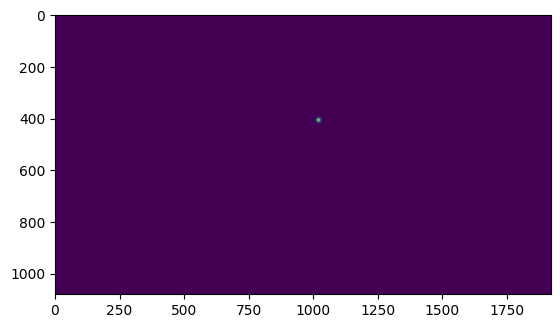

In [45]:
plt.imshow(flow_x)

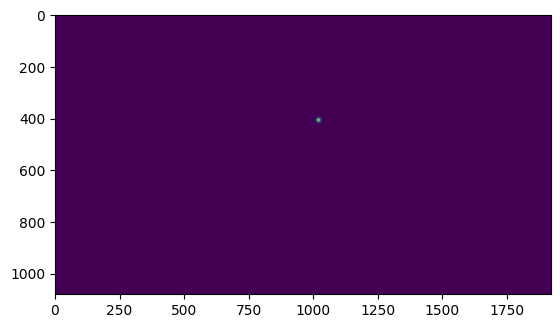

In [46]:
plt.imshow(flow_y)

In [ ]:
for i in range(5):
    print(f"anchor_c{i}", data_item[f"anchor_c{i}"].shape)
    print(f"anchor_aug_c{i}", data_item[f"anchor_aug_c{i}"].shape)
    print(f"semi_positives_c{i}", data_item[f"semi_positives_c{i}"].shape)

anchor_c0 torch.Size([1, 25, 12])
anchor_aug_c0 torch.Size([1, 27, 12])
semi_positives_c0 torch.Size([10, 41, 12])
anchor_c1 torch.Size([1, 25, 4])
anchor_aug_c1 torch.Size([1, 27, 4])
semi_positives_c1 torch.Size([10, 41, 4])
anchor_c2 torch.Size([1, 25, 4])
anchor_aug_c2 torch.Size([1, 27, 4])
semi_positives_c2 torch.Size([10, 41, 4])
anchor_c3 torch.Size([1, 25, 4])
anchor_aug_c3 torch.Size([1, 27, 4])
semi_positives_c3 torch.Size([10, 41, 4])
anchor_c4 torch.Size([1, 25, 4])
anchor_aug_c4 torch.Size([1, 27, 4])
semi_positives_c4 torch.Size([10, 41, 4])


In [26]:
import os

In [29]:
def visualize_keypoint(c0, c1, c2, c3, c4, a):
    __, K, D = c0.shape
    os.mkdir('test/semi/'+a.split('/')[-1].split('.')[0])
    
    neck_keypoint = np.array([5.0, 5.0]).reshape(1, 1, 2)
    neck_keypoint = np.tile(neck_keypoint, [1, K, 1])
    
    nose = c0[:, :, :2] + neck_keypoint
    left_shoulder = c0[:, :, 2:4] + neck_keypoint
    right_shoulder = c0[:, :, 4:6] + neck_keypoint
    mid_hip = c0[:, :, 6:8] + neck_keypoint
    left_hip = c0[:, :, 8:10] + mid_hip
    right_hip = c0[:, :, 10:12] + mid_hip

    left_elbow = c1[:, :, 0:2]  + left_shoulder
    left_wrist = c1[:, :, 2:4] + left_elbow

    right_elbow = c2[:, :, 0:2]  + right_shoulder
    right_wrist = c2[:, :, 2:4] + right_elbow

    left_knee = c3[:, :, 0:2] + left_hip
    left_ankle = c3[:, :, 2:4] + left_knee

    right_knee = c4[:, :, 0:2] + right_hip
    right_ankle = c4[:, :, 2:4] + right_knee

    restored_keypoints = np.stack([
        nose,
        neck_keypoint,
        left_shoulder,
        right_ankle,
        mid_hip,
        left_hip,
        right_hip,
        left_elbow,
        left_wrist,
        right_elbow,
        right_wrist,
        left_knee,
        left_ankle,
        right_knee,
        right_ankle
    ], axis=-2)

    print(restored_keypoints.shape)
    print(restored_keypoints.max(), restored_keypoints.min())

    for frame_index in range(restored_keypoints.shape[1]):
        canvas = np.zeros((10, 10))

        fig, ax = plt.subplots(1, 1)
        ax.imshow(canvas)

        for keypoint_index in range(restored_keypoints.shape[2]):
            ax.add_patch(patches.Circle(
                [restored_keypoints[0, frame_index, keypoint_index][1], restored_keypoints[0, frame_index, keypoint_index][0]],
                radius=0.1,
                fill=True,
                color="red"
            ))
        
        fn = 'test/semi/'+a.split('/')[-1].split('.')[0]+'/'+str(frame_index)
        plt.savefig(fn)
        plt.show()

In [10]:
def test_anchor(index):
    data_item = dataset[index]
    visualize_keypoint(
        *[data_item[f"anchor_c{i}"] for i in range(5)]
    )

In [30]:
def test_anchor_aug(index):
    a, data_item = dataset[index]
    visualize_keypoint(
        *[data_item[f"anchor_aug_c{i}"] for i in range(5)], a
    )
    print(a)

In [32]:
import tensorflow as tf

2024-05-17 11:44:36.319846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 11:44:37.320175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
def test_semi(index):
    a, data_item = dataset[index]
    for j in range(len(a)):
        visualize_keypoint(
            *[data_item[f"semi_positives_c{i}"][j][tf.newaxis,:,:] for i in range(5)], a[j]
        )
        print(a[j])

In [20]:
a, data_item = dataset[0]
print(a)

['dataset/a073_kp/S026C002P077R002A073_rgb_kp.json', 'dataset/a073_kp/S023C003P066R002A073_rgb_kp.json', 'dataset/a073_kp/S025C001P055R001A073_rgb_kp.json', 'dataset/a073_kp/S027C003P006R002A073_rgb_kp.json', 'dataset/a073_kp/S030C002P041R001A073_rgb_kp.json', 'dataset/a073_kp/S026C001P044R002A073_rgb_kp.json', 'dataset/a073_kp/S024C002P064R001A073_rgb_kp.json', 'dataset/a073_kp/S029C001P075R001A073_rgb_kp.json', 'dataset/a073_kp/S020C002P053R002A073_rgb_kp.json', 'dataset/a073_kp/S030C003P044R002A073_rgb_kp.json']


In [7]:
dataset.all_data_dir_list[0], dataset.all_data_dir_list[90], dataset.all_data_dir_list[2345], dataset.all_data_dir_list[10201], dataset.all_data_dir_list[56704]

('dataset/a073_kp/S028C002P087R001A073_rgb_kp.json',
 'dataset/a073_kp/S030C002P075R001A073_rgb_kp.json',
 'dataset/a046_kp/S007C003P007R001A046_rgb_kp.json',
 'dataset/a084_kp/S028C001P070R002A084_rgb_kp.json',
 'dataset/a103_kp/S018C002P008R001A103_rgb_kp.json')

In [ ]:
test_semi(3444)

In [3]:
import os
import numpy as np
import json
import torch
import math

In [2]:
def extract_keypoints_from_a_json(origin_vid_dir):
    with open(origin_vid_dir, "r") as f:
        origin_keypoints = json.load(f)

    origin_keypoints_anno = origin_keypoints['annotations']
    origin_tmp_list = []
    for frame_data in origin_keypoints_anno:
        if frame_data:
            keypoints_list = [frame_data[key] for key in frame_data if frame_data[key]]
            if keypoints_list:
                origin_tmp_list.extend(keypoints_list)

    # # Nonetype error 발생하는 듯
    # if not origin_tmp_list:
    #     return None

    # reshape x
    origin_anchor_keypoints = np.array(origin_tmp_list)[:,:,[0,1]]
    return origin_anchor_keypoints

In [44]:
def gaussian(points, h, w , sigma):
    x = points[:,[1]][0]
    y = points[:,[0]][0]
    channel = [np.exp(-((w - x) ** 2 + (h - y) ** 2) / (2 * sigma ** 2))]
    # channel = np.reshape(channel, newshape=(h,w))
    return channel

In [45]:
data = extract_keypoints_from_a_json('dataset/a001_kp/S001C001P001R001A001_rgb_kp.json')
points = data.reshape(-1,2)

h = 1080
w = 1920

sigma = 5

channel = gaussian(points, h, w, sigma)

print(channel)

# x_points = x.reshape(-1,)
# y_points = y.reshape(-1,)

# x_gau = gaussian(x_points, mean, sigma)
# mu_x = 0.5 * (x + 1.) * w
# mu_y = 0.5 * (y + 1.) * h

# tmp_size = sigma * 3

# x1, y1 = mu_x - tmp_size, mu_y - tmp_size

# print(x_gau)

[array([0.])]


In [ ]:
# N, H, W = 12, 10, 10
# landmarks = torch.randint(0, H, (N, 2))

# tmp = torch.zeros(N, 3, H, W)
# rows, cols = landmarks.split(1, 1)
# tmp[torch.arange(N), :, rows, cols] = 1.

# image = torch.randn(N, 3, H, W)
# image = torch.cat((image, tmp), 1)
# print(image.shape)
# > torch.Size([12, 6, 10, 10])

np.transpose()

In [52]:
kp = (100, 150) # W,H
kp2 = (100, 180)
H = np.tile(np.arange(256), 256).reshape(256,256).T
W = np.tile(np.arange(256), 256).reshape(256,256)

std = 5
x_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((H-kp[1])/std)**2) 
y_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((W-kp[0])/std)**2)
frame1 = 1000*(x_gauss * y_gauss)

print(W)

[[  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 ...
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]]


In [53]:
def extract_keypoints_from_a_json(origin_vid_dir):
    with open(origin_vid_dir, "r") as f:
        origin_keypoints = json.load(f)

    origin_keypoints_anno = origin_keypoints['annotations']
    origin_tmp_list = []
    for frame_data in origin_keypoints_anno:
        if frame_data:
            keypoints_list = [frame_data[key] for key in frame_data if frame_data[key]]
            if keypoints_list:
                origin_tmp_list.extend(keypoints_list)

    # # Nonetype error 발생하는 듯
    # if not origin_tmp_list:
    #     return None

    # reshape x
    origin_anchor_keypoints = np.array(origin_tmp_list)[:,:,[0,1]]
    return origin_anchor_keypoints

In [7]:
import numpy as np
import json

data = extract_keypoints_from_a_json('dataset/a001_kp/S001C001P001R001A001_rgb_kp.json')
points = data.reshape(-1,2)
x_points = points[:,[0]]
y_points = points[:,[1]]

h = 1080
w = 1920
# w = 1920*(1080/1920)

H = np.tile(np.arange(h), h).reshape(h,h).T
print(H)
print(H.shape)
W = np.tile(np.arange(w), w).reshape(w,w)
print(W.shape)

std = 5
x = x_points[0]
y = y_points[0]*(1080/1920)
x_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((H-x)/std)**2) 
y_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((W-y)/std)**2)
frame1 = 1000*(x_gauss * y_gauss)


[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1077 1077 1077 ... 1077 1077 1077]
 [1078 1078 1078 ... 1078 1078 1078]
 [1079 1079 1079 ... 1079 1079 1079]]
(1080, 1080)
(1920, 1920)


ValueError: operands could not be broadcast together with shapes (1080,1080) (1920,1920) 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from PIL import Image

data = extract_keypoints_from_a_json('dataset/a001_kp/S001C001P001R001A001_rgb_kp.json')
points = data.reshape(-1,2)
x_points = points[:,[0]]
y_points = points[:,[1]]

h = 1080
w = 1920
# w = 1920*(1080/1920)

H = np.tile(np.arange(h)[:, None], (h, w))
print(H)
print(H.shape)
W = np.tile(np.arange(w)[None, :], (h, w))

std = 5

# org_image = Image.open('frame0.jpg')
# resized_image = org_image.resize((int(w), h))

for i in range(17):
    x = x_points[i]
    y = y_points[i]
    # y = y_points[i]*(1080/1920)
    x_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((H-x)/std)**2) 
    y_gauss = 1/(np.sqrt(2*np.pi)*std) * np.exp(-0.5*((W-y)/std)**2)
    frame = (x_gauss * y_gauss)

    # plt.imshow(resized_image)
    # plt.imshow(frame, alpha = 0.6, cmap = 'viridis')
    plt.imshow(frame)
    plt.savefig(f'heatmap/A001{i}.png', bbox_inches='tight', pad_inches=0)
    # overlap = frame * 0.4 + resized_image

    # overlap_pil = Image.fromarray(overlap)
    # overlap_pil.show()

    # overlap_pil.save(f'overlap/frame{i}.png','png')

    # ax = sns.heatmap(overlap)
    # plt.show()


NameError: name 'extract_keypoints_from_a_json' is not defined